2022-03-15 <br/>
CRAN/BIOC Vignettes  <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-03-15/readme.md

Heatmap - Completed  <br/>
Github representation via heatmap - Completed

In [226]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [227]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-15/cran.csv')
df.head()

,package,version,date,rnw,rmd
0,A3,0.9.1,2013-02-06 16:46:12 UTC,0,0
1,A3,0.9.2,2013-03-26 18:58:12 UTC,0,0
2,aaMI,1.0-0,Fri Jun 24 11:43:01 2005,0,0
3,aaMI,1.0-1,Mon Oct 17 11:06:36 2005,0,0
4,aaSEA,1.0.0,2019-07-28 14:50:25 UTC,0,1


In [228]:
# Removing bad date values
df = df[df.date!="0"]

In [229]:
# Finding the top 5 packages 
vals = df['package'].value_counts(ascending=False).reset_index().head()['index'].to_list()
vals

['spatstat', 'Matrix', 'RcppArmadillo', 'rgdal', 'caret']

In [230]:
df_vals = df[df.package.isin(vals)].reset_index()
df_vals.head()

,index,package,version,date,rnw,rmd
0,10451,caret,2.27,Thu Oct 4 15:53:04 2007,0,0
1,10452,caret,2.29,Tue Oct 9 08:54:23 2007,0,0
2,10453,caret,3.08,Wed Nov 28 16:05:50 2007,0,0
3,10454,caret,3.12,Wed Feb 27 19:03:17 2008,0,0
4,10455,caret,3.13,Fri Feb 29 15:56:53 2008,0,0


In [231]:
# Extracting the years after formatting the dates
df_vals['year'] = pd.to_datetime(df_vals['date'],errors='coerce',utc=True).dt.strftime("%Y")
df_vals.head()

,index,package,version,date,rnw,rmd,year
0,10451,caret,2.27,Thu Oct 4 15:53:04 2007,0,0,2007
1,10452,caret,2.29,Tue Oct 9 08:54:23 2007,0,0,2007
2,10453,caret,3.08,Wed Nov 28 16:05:50 2007,0,0,2007
3,10454,caret,3.12,Wed Feb 27 19:03:17 2008,0,0,2008
4,10455,caret,3.13,Fri Feb 29 15:56:53 2008,0,0,2008


In [232]:
df_cleaned=df_vals.groupby(['year','package'])['index'].count().reset_index()

In [233]:
df_cleaned.head()

,year,package,index
0,2004,Matrix,18
1,2004,rgdal,2
2,2004,spatstat,7
3,2005,Matrix,30
4,2005,spatstat,20


In [234]:
# Plotting a heatmap - Github style
fig = go.Figure(data=go.Heatmap(
                   z=df_cleaned['index'],
                   x=df_cleaned.year,
                   y=df_cleaned.package,
                   hoverongaps = False,
                   colorscale = 'Greens' ))
fig.update_layout(title="How many times were the top R packages updated")                 
fig.show()

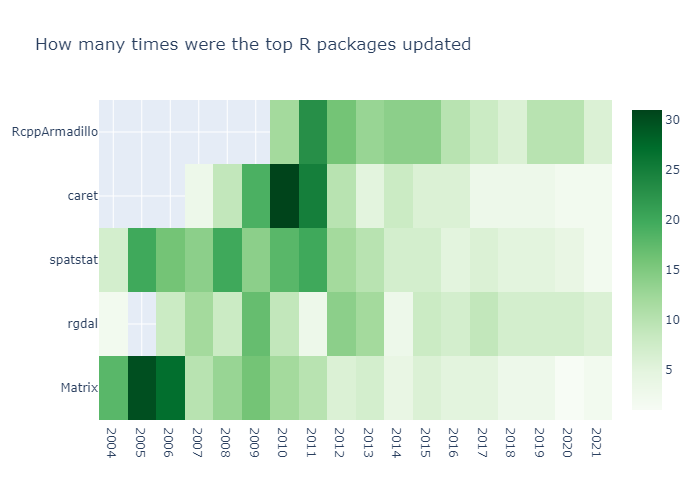

In [235]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [236]:
# Looking at the activity chart of the most updated package - Caret (2010)

df_max = df[df.package=='caret'].reset_index()
df_max.head()

,index,package,version,date,rnw,rmd
0,10451,caret,2.27,Thu Oct 4 15:53:04 2007,0,0
1,10452,caret,2.29,Tue Oct 9 08:54:23 2007,0,0
2,10453,caret,3.08,Wed Nov 28 16:05:50 2007,0,0
3,10454,caret,3.12,Wed Feb 27 19:03:17 2008,0,0
4,10455,caret,3.13,Fri Feb 29 15:56:53 2008,0,0


In [237]:
pd.to_datetime(df_max['date'].head(),errors='coerce',utc=True).dt.strftime("%a")

0    Thu
1    Tue
2    Wed
3    Wed
4    Fri
Name: date, dtype: object

In [238]:
df_max['year'] = pd.to_datetime(df_max['date'],errors='coerce',utc=True).dt.strftime("%Y")
df_max['month'] = pd.to_datetime(df_max['date'],errors='coerce',utc=True).dt.strftime("%b")
df_max['day'] = pd.to_datetime(df_max['date'],errors='coerce',utc=True).dt.strftime("%a")
df_max['week_day'] = pd.to_datetime(df_max['date'],errors='coerce',utc=True).dt.strftime("%w")
df_max.head()

,index,package,version,date,rnw,rmd,year,month,day,week_day
0,10451,caret,2.27,Thu Oct 4 15:53:04 2007,0,0,2007,Oct,Thu,4
1,10452,caret,2.29,Tue Oct 9 08:54:23 2007,0,0,2007,Oct,Tue,2
2,10453,caret,3.08,Wed Nov 28 16:05:50 2007,0,0,2007,Nov,Wed,3
3,10454,caret,3.12,Wed Feb 27 19:03:17 2008,0,0,2008,Feb,Wed,3
4,10455,caret,3.13,Fri Feb 29 15:56:53 2008,0,0,2008,Feb,Fri,5


In [239]:
# Focusing on 2010
df_month = df_max[df_max.year=='2010'].reset_index()

In [245]:
df_cleaned_max=df_month.groupby(['month','day','week_day'])['index'].count().reset_index()
df_cleaned_max.head()

,month,day,week_day,index
0,Apr,Mon,1,1
1,Apr,Sat,6,1
2,Aug,Fri,5,1
3,Aug,Sat,6,1
4,Aug,Sun,0,1


In [242]:
# Ordering by the day of the week
df_cleaned_max.sort_values(by=['week_day'],ignore_index=True,inplace=True,ascending=False)

In [243]:
# Plotting a heatmap - Github style
fig = go.Figure(data=go.Heatmap(
                   z=df_cleaned_max['index'],
                   x=df_cleaned_max.month,
                   y=df_cleaned_max.day,
                   hoverongaps = False,
                   colorscale = 'Greens' ))
fig.update_xaxes(side="top")
fig.update_layout(title="GitHub Activity of Caret in 2010")             
fig.update_traces(showscale=False)    
fig.show()

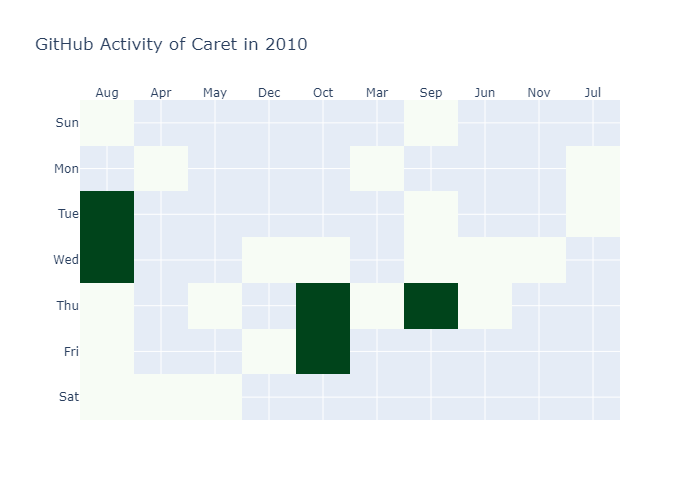

In [244]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)